# House Rocket - Project Insight

## 0.0. Imports

In [175]:
import warnings

import pandas   as pd
import numpy    as np
import seaborn  as sns

import matplotlib.pyplot    as plt
import plotly.express       as px

from matplotlib import gridspec
from pandas import reset_option

### 0.1. Helper Functions

In [264]:
#Função que executa o percentual para cada Insights    
def calculo_percentual(df, coluna):
    date = df.sort_values(by= coluna, ascending=True).reset_index().drop(columns= 'index')
    date = (date.loc[1,coluna] / date.loc[0, coluna] - 1) * 100
    
    return date

# Função para plotar os graficos nos Insights
def plot_bar (df, x, y):

    fig = px.bar(df, x, y)
    fig.update_layout(xaxis_rangeslider_visible=False, margin=dict(l=120, r=20, t=20, b=20), template = 'simple_white',
                  paper_bgcolor="#f7f8fa", width=800,height=400)

    fig.show()


def jupyter_settings():
    %matplotlib inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [10, 8]
    plt.rcParams['font.size'] = 24
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.2f' % x)

### 0.2. Loading data

In [177]:
df = pd.read_csv('datasets/kc_house_data.csv')

## 1.0. Descrição dos Dados

In [178]:
df1 = df.copy()

In [179]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### 1.1. Data Dimensions

In [180]:
print('Número de linha: {}'.format(df1.shape[0]))
print('Número de colunas: {}'.format(df1.shape[1]))


Número de linha: 21613
Número de colunas: 21


In [181]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### 1.2. Data Types

In [182]:
#Transformação da Coluna data de String para Datetime
df1['date'] = pd.to_datetime(df1['date'])

#Visualização dos dados por tipo.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

#### 1.2.1 Transformando a coluna "Floors"

<BarContainer object of 21613 artists>

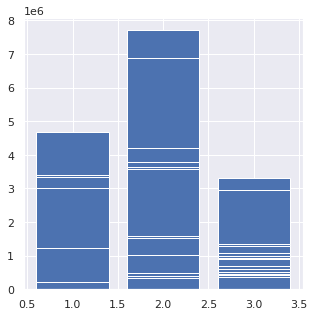

In [183]:
#Convertendo para tipo int
df1['floors'] = df1['floors'].astype(int)

#plot
fig=plt.figure(figsize= (5, 5))
plt.bar(x=df1['floors'], height= df1['price'])

### 1.3. Check NA

In [184]:
df1.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 1.3.1. Fillout NA

In [185]:
df1 = df1.dropna(axis=0)

In [186]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.4. Vericando Outliers

In [187]:
boxplot= df1[['bedrooms', 'bathrooms', 'floors','view', 'condition', 'grade']]


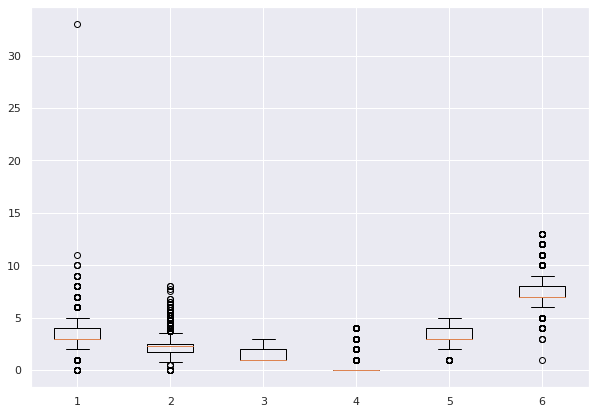

In [188]:
fig = plt.figure(figsize= (10, 7))

plt.boxplot(boxplot)

plt.show()

In [189]:
# Remoção do outlines
df1[df1['bedrooms']== 33]
df1.drop(df1[df1['bedrooms']== 33].index, inplace=True)

### 1.5. Descriptive Statistical

In [190]:
# Variáveis númericas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])


#### 1.5.1 Numerical Attributes

In [191]:
# Central Tendency -> mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T


# concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = (['attibutes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [192]:
m

,attibutes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580402307.49,3904930470.00,2876527410.33,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,540083.52,450000.00,367126.57,4.02,34.58
2,bedrooms,0.00,11.00,11.00,3.37,3.00,0.91,0.52,1.84
3,bathrooms,0.00,8.00,8.00,2.11,2.25,0.77,0.51,1.28
4,sqft_living,290.00,13540.00,13250.00,2079.92,1910.00,918.44,1.47,5.24
5,sqft_lot,520.00,1651359.00,1650839.00,15107.39,7619.00,41420.47,13.06,285.07
6,floors,1.00,3.00,2.00,1.45,1.00,0.55,0.73,-0.55
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.38,127.63
8,view,0.00,4.00,4.00,0.23,0.00,0.77,3.40,10.89
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.03,0.53


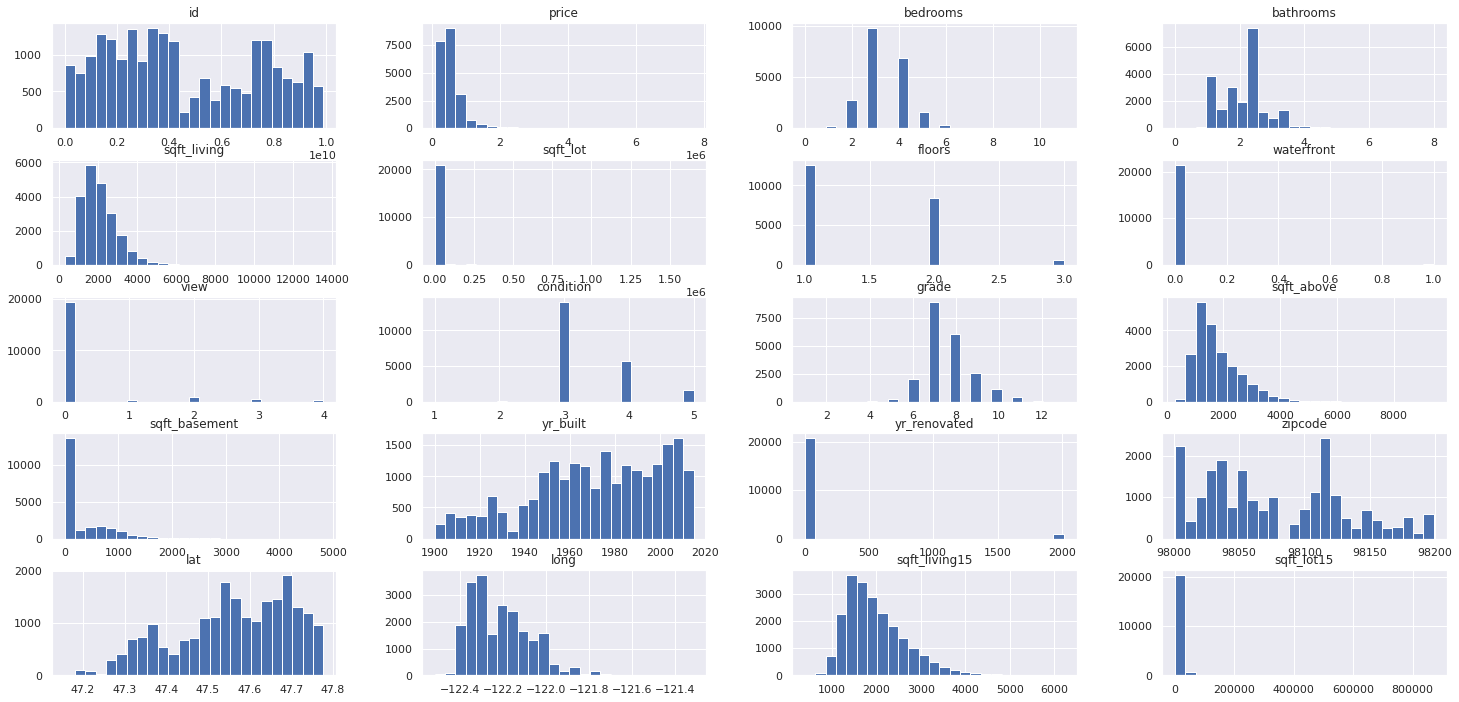

In [193]:
num_attributes.hist(bins=25);

## 2.0. Feature Engineering

In [194]:
df2 = df1.copy()

#### 2.1. Criação das Hipóteses

Hipoteses:

- H1: Imóvies que possuem vista para água, são 30% mais caros, na media
- H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
- H3: Imóveis sem porão possuem área toral(sqrt_lot), são 40% maiores do que os imoveis com porão.
- H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10%.
- H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
- H6: Imóveis reformados são 30% mais caro na média..
- H7: Imoveis vendem 30% mais no verão.
- H8: Imoveis são 15% mais caro no verão.


### 2.3. Feature Engineering

In [234]:

# Delimitador entre imoveis antigos, e novos(anteriores a 1958 serão considerados antigos)
df2.loc[df2['yr_built'] < 1955, 'age_house']= 'old'
df2.loc[df2['yr_built'] > 1955, 'age_house']= 'new'

# Imoveis com o sem Porão
df2.loc[df2['sqft_basement'] == 0, 'basement'] = 'no'
df2.loc[df2['sqft_basement'] > 0, 'basement'] = 'yes'

# Criação de uma nova coluna com o ano da publicação de imovel para venda
df2['year'] = pd.to_datetime(df2['date']).dt.year


# Criação de uma nova coluna contendo apenas o mês da publicação do imovel a venda
df2['month'] = pd.to_datetime(df2['date']).dt.month
df2['month_name'] = pd.to_datetime(df2['date']).dt.month_name()

# Criação de uma coluna  discriminando se o imovel foi ou não reformado 
df2.loc[df2['yr_renovated'] == 0, 'renovated'] = 'no'
df2.loc[df2['yr_renovated'] > 0, 'renovated'] = 'yes'
# Coluna discriminando as estações do ano em imovel foi publicado a venda
df2.loc[(df2['month'] >=6) & (df2['month'] <=8), 'season'] = 'summer'
df2.loc[(df2['month'] >=9) & (df2['month'] <=11), 'season'] = 'autumn'
df2.loc[(df2['month'] == 12) | (df2['month'] <=2),'season'] = 'winter'
df2.loc[(df2['month'] >=3) & (df2['month'] <=5), 'season'] = 'spring'

## 3.0. Analise Exploratória dos Dados

In [196]:
df3 = df2.copy()

H1: Imóvies que possuem vista para água, são 30% mais caros, na media

 A Hipótese é Verdadeira, pois imóveis com visão para o mar são na média 212.64% mais caros que os demais.


<AxesSubplot:xlabel='waterfront', ylabel='price'>

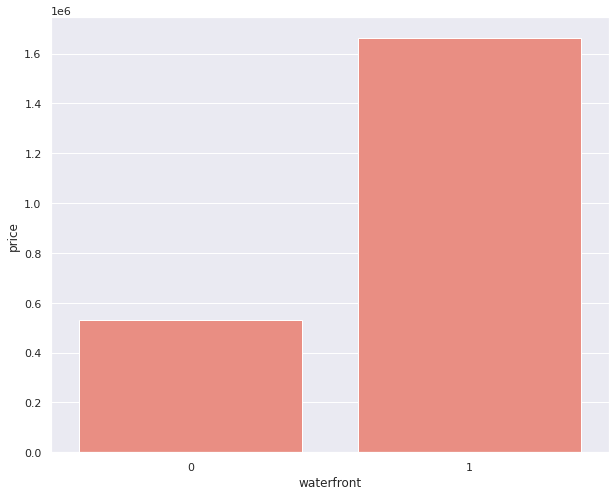

In [257]:
# H1: Imóvies que possuem vista para água, são 30% mais caros na media

h1= df3[['waterfront','price']].groupby(['waterfront']).mean().reset_index()

# função do percentual
h1_p = calculo_percentual(df=h1, coluna='price')

# Analise da Hipótese
print(' A Hipótese é Verdadeira, pois imóveis com visão para o mar são na média {:.2f}% mais caros que os demais.'.format(h1_p))

# plot
sns.barplot(x='waterfront', y='price', data=h1, color = "salmon")



H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.

In [249]:
# H2: Imóveis com data de construção menor que 1955, são 50% mais baratos, na média.
h2 = df3[['age_house', 'price']].groupby(['age_house']).mean().reset_index()

# Calculo do percentual
h2_p = calculo_percentual(df=h2, coluna='price')


# Analise da Hipótese
print(' A Hipótese é falsa, pois imóveis com data de construção menor que 1955 são na média {:.2f}% mais barato.'.format(h2_p))

plot_bar(df=h2, x='age_house', y='price')


 A Hipótese é falsa, pois imóveis com data de construção menor que 1955 são na média 2.94% mais barato.


H3: Imóveis sem porão possuem área toral(sqrt_lot), são 40% maiores do que os imoveis com porão.

A Hipótese é falsa, pois imóveis sem porão são 22.56% maiores que os com porão


<AxesSubplot:xlabel='basement', ylabel='sqft_lot'>

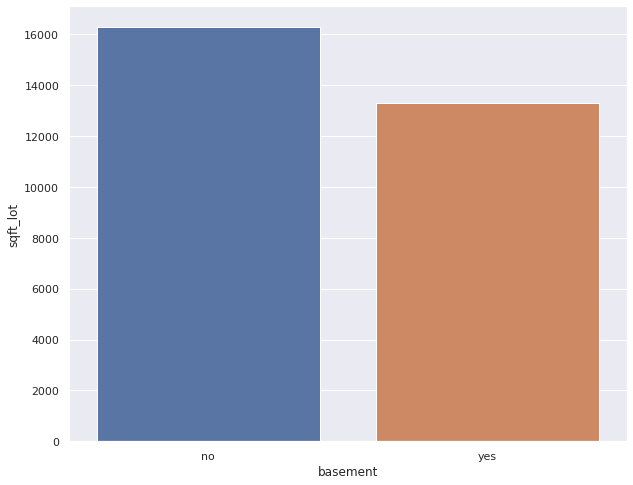

In [253]:
#H3: Imóveis sem porão(sqrt_basement), são 40% maiores do que os imoveis com porão na média.
h3 = df2[['basement', 'sqft_lot']].groupby('basement').mean().reset_index()

# Calculo do percentual
h3_perc = (h3.loc[0, 'sqft_lot'] / h3.loc[1, 'sqft_lot'] - 1) * 100

# Analise da Hipótese
print('A Hipótese é falsa, pois imóveis sem porão são {:.2f}% maiores que os com porão'.format(h3_perc))

# plot
sns.barplot(x='basement', y='sqft_lot', data=h3)

 H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10%.

A Hipótese é falsa, pois o crescimento ano a ano dos  preços foi de apenas 0.52% de um ano para outro


<AxesSubplot:xlabel='year', ylabel='price'>

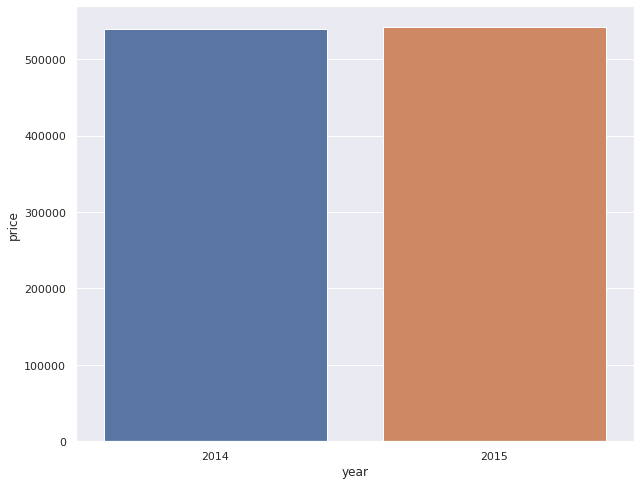

In [260]:
# H4: O crescimento do preço dos imoveis YoY(Year over Year) é de 10% na media.
h4 = df3[['year', 'price']].groupby('year').mean().reset_index()

# Calculo Percentual da variação
h4_p = (h4.loc[1, 'price'] / h4.loc[0, 'price'] - 1) * 100

# Analise da Hipótese
print('A Hipótese é falsa, pois o crescimento ano a ano dos  preços foi de apenas {:.2f}% de um ano para outro'.format(h4_p))

# plot
sns.barplot(x='year', y='price', data=h4)

H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.

A Hipótese é falsa, o crescimento Month over Month na média é de 0.23%


<AxesSubplot:xlabel='month', ylabel='price'>

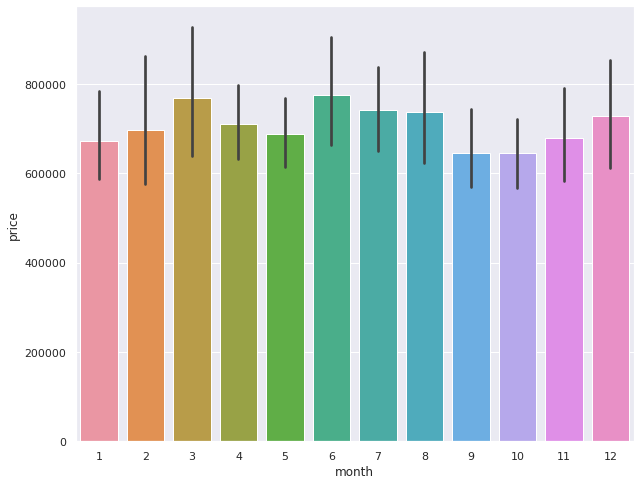

In [262]:
#H5: Imóveis com 3 banheiros tem um crescimento de MoM (Month over Month) de 15%.
h5 =df3[df3['bathrooms'] == 3][['bathrooms', 'year', 'month','month_name', 'price']].sort_values(by=['year', 'month']).reset_index().drop('index', axis=1)
h5_group = h5.groupby(['year', 'month', 'month_name']).mean().reset_index().drop('bathrooms', axis=1)

#Calculo da variação percentual mes a mes
h5_perc = 0
for i in range(0, 12):
    var = (h5_group.iloc[i+1, 3] / h5_group.iloc[i, 3] *100) - 100
    h5_perc = h5_perc + var
h5_perc = h5_perc / 12

#Conclusão
print('A Hipótese é falsa, o crescimento Month over Month na média é de {:.2f}%'.format(h5_perc))

# plot
sns.barplot(x='month', y='price', data=h5)


H6: Imóveis reformados são 30% mais caro na média

A Hipótese é verdadeira, os imóveis reformados são 43.37% mais caros na média


<AxesSubplot:xlabel='renovated', ylabel='price'>

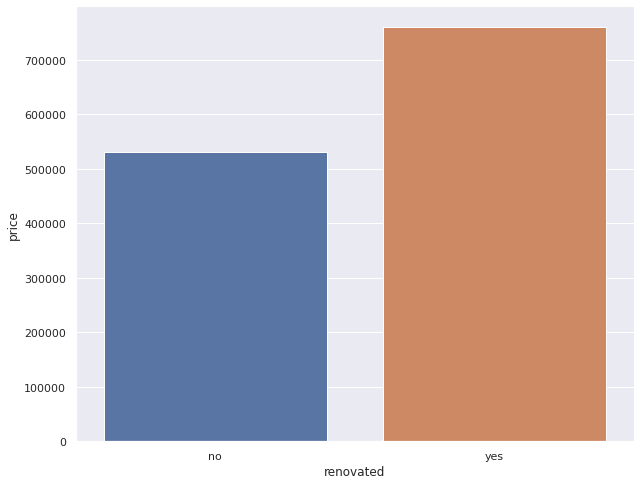

In [256]:
# H6: Imóveis reformados são 30% mais caro na média.
h6 = df3[['renovated', 'price']].groupby('renovated').mean().reset_index()

# Calculo do percentual
h6_perc = (h6.loc[1, 'price'] / h6.loc[0, 'price'] - 1) * 100

# Analise da Hipótese
print('A Hipótese é verdadeira, os imóveis reformados são {:.2f}% mais caros na média'.format(h6_perc))

# plot
sns.barplot(x='renovated', y='price', data=h6)

H7: Imoveis vendem 30% mais no verão.

A Hipótese é falsa, imóveis vendem -2.91% a menos no verão em comparação a primavera que é a estação que mais vende


<AxesSubplot:xlabel='Season', ylabel='Count'>

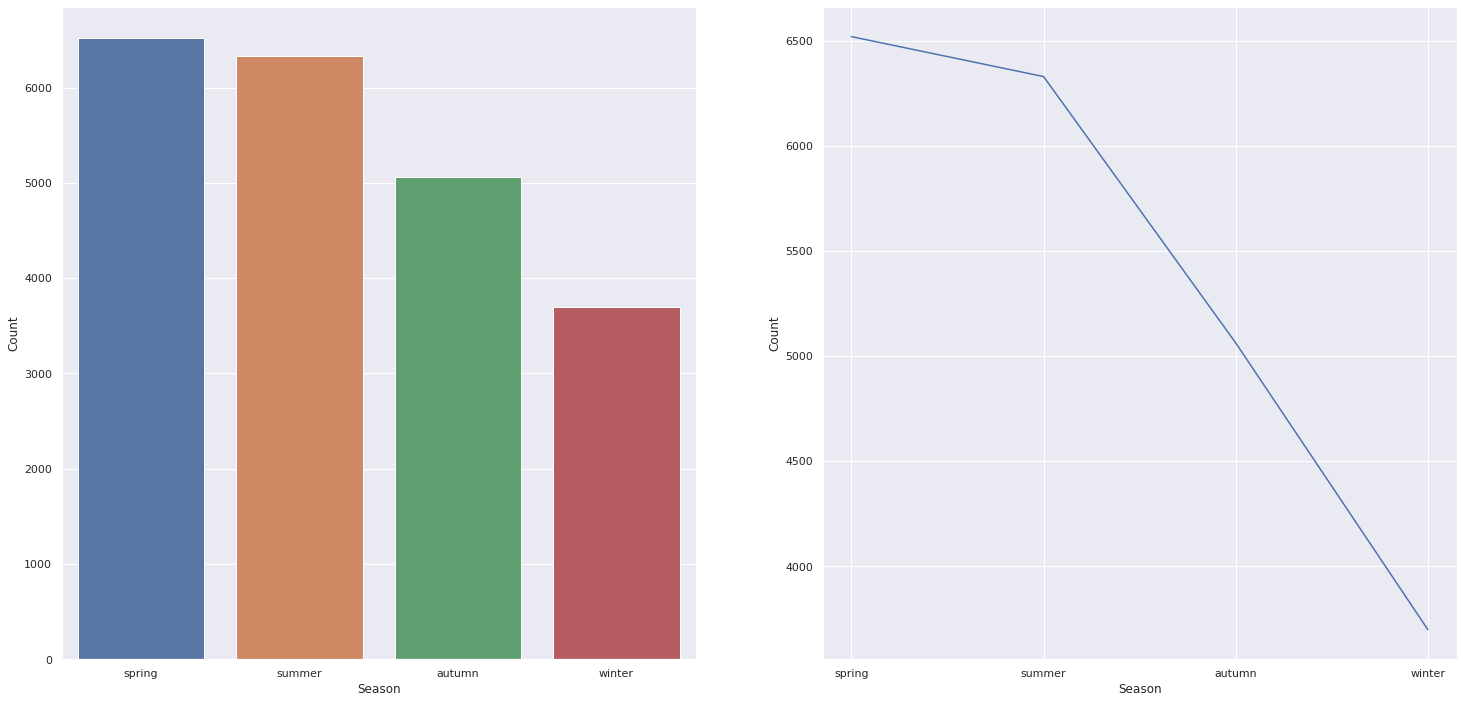

In [229]:
#H7: Imoveis vendem 30% mais no verão.
h7 = df3[['season', 'price']].groupby('season').count().sort_values(by='price', ascending=False).reset_index()
h7.rename(columns= {'season':'Season', 'price': 'Count'}, inplace=True)

# Calculo do percentual
h7_perc = (h7.loc[1, 'Count'] / h7.loc[0, 'Count'] -1) *100

# Analise da Hipótese
print('A Hipótese é falsa, imóveis vendem {:.2f}% a menos no verão em comparação a primavera que é a estação que mais vende'.format(h7_perc))

# plot
plt.subplot(1,2,1)
sns.barplot(x='Season', y='Count', data=h7)

plt.subplot(1,2,2)
sns.lineplot(x='Season', y='Count', data=h7)

H8: Imoveis são 15% mais caro no verão.

A Hipótese é falsa, imoveis no verão vendem -1.06% em relação a primavera, que é a estação que mais vende.


<AxesSubplot:xlabel='price', ylabel='season'>

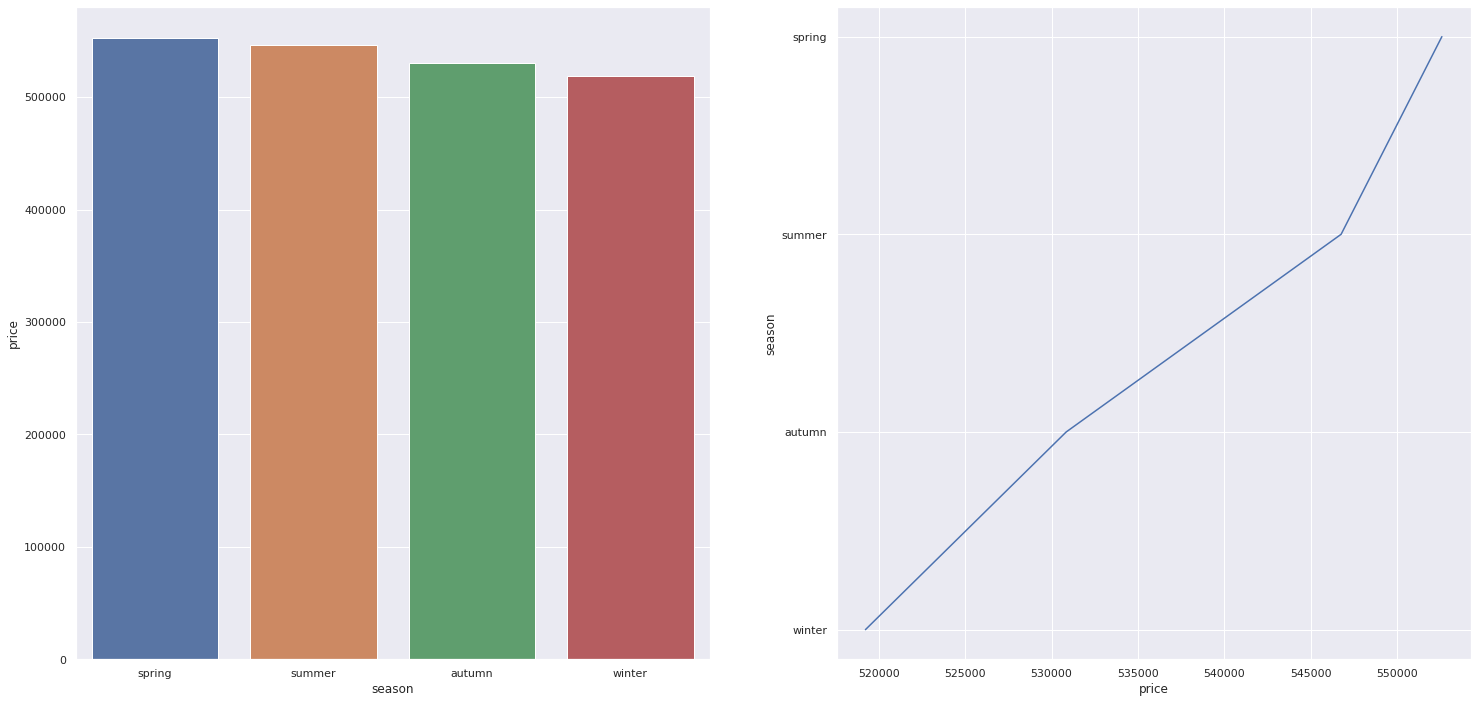

In [230]:
#H8: Em media os imóveis são 15% mais caro no verão.
h8 = df3[['season', 'price']].groupby('season').mean().sort_values(by='price', ascending=False).reset_index()

# Calculo do percentual
h8_perc = (h8.loc[1, 'price'] / h8.loc[0, 'price'] - 1) * 100

# Analise da Hipótese
print('A Hipótese é falsa, imoveis no verão vendem {:.2f}% em relação a primavera, que é a estação que mais vende.'.format(h8_perc))

# plot
plt.subplot(1,2,1)
sns.barplot(x='season', y='price', data=h8)

plt.subplot(1,2,2)
sns.lineplot(x='price', y='season', data=h8)



## 4.0. Questão de Negócio

In [206]:
df4 = df3.copy()

#### 4.1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?
- Passos a serem tomados para a resolução:
- Agrupar os imóveis por região (zipcode).
- Dentro de cada região, encontrar a mediana do preço do imóvel.
- Sugerir os imóveis que estão abaixo do preço mediano da região e que estejam em boas condições.
- Construir uma tabela com recomendações de compra ou não compra.

In [207]:
# Agrupamento por zipcode e mediana de cada região
zip_median = df4[['zipcode', 'price']].groupby('zipcode').median().reset_index()

In [208]:
zip_median.head()

,zipcode,price
0,98001,260000.00
1,98002,235000.00
2,98003,267475.00
3,98004,1150000.00
4,98005,765475.00


In [209]:
# Agrupamento por zipcode e mediana de cada região
zip_median = df4[['zipcode', 'price']].groupby('zipcode').median()
zip_median = zip_median.rename(columns={'price': 'price_median'})

# Agrupando a mediana ao Dataset
df5 = pd.merge(df4, zip_median, on='zipcode', how='inner')

#Removendo linhas duplicatdas do Dataset
df5 = df5.drop_duplicates( subset= 'id', keep= 'last')

df5 = df5.reset_index()

In [210]:
df5.head()

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_house,basement,year,month,month_name,renovated,season,price_median
0,0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,old,no,2014,10,October,no,autumn,278277.00
1,1,4060000240,2014-06-23,205425.00,2,1.00,880,6780,1,0,0,4,6,880,0,1945,0,98178,47.50,-122.25,1190,6780,old,no,2014,6,June,no,summer,278277.00
2,2,4058801670,2014-07-17,445000.00,3,2.25,2100,8201,1,0,2,3,8,1620,480,1967,0,98178,47.51,-122.24,2660,8712,new,yes,2014,7,July,no,summer,278277.00
3,3,2976800796,2014-09-25,236000.00,3,1.00,1300,5898,1,0,0,3,7,1300,0,1961,0,98178,47.51,-122.25,1320,7619,new,no,2014,9,September,no,autumn,278277.00
4,4,6874200960,2015-02-27,170000.00,2,1.00,860,5265,1,0,0,3,6,860,0,1931,0,98178,47.50,-122.27,1650,8775,old,no,2015,2,February,no,winter,278277.00


In [211]:
# Sugestao de compra ou nao com base na mediana do preco na regiao e condicao do imovel.

df5['status'] = 0

for i in range(len(df5)):
    if (df5.loc[i, 'price_median'] > df5.loc[i, 'price']) & (df5.loc[i, 'condition'] >=3) & (df5.loc[i, 'grade'] >=7):
        df5.loc[i, 'status'] = 'buy'

    else:
        df5.loc[i, 'status'] = 'Not buy'

In [212]:
df5['status'].value_counts()

print('Temos {} imóveis para compra e {} imóveis não aptos, seguindo o nosso criterio se avaliação'.format(df5['status'].value_counts()[1], format(df5['status'].value_counts()[0])))

Temos 8578 imóveis para compra e 12857 imóveis não aptos, seguindo o nosso criterio se avaliação


#### 4.2 Uma vez a casa comprada. Precisamos calcular qual melhor momento para vendê-las e por qual preço.

- Passos a serem tomados para resolução:

-   Agrupar os imóveis por região (zipcode) e por sazonalidade (month).
-   Dentro de cada região e sazonalidade, calcular a mediana do preço.
    
-   Condições de Venda:
    
      - Se o preço da compra for maior que a mediana da região + sazonalidade.
          - O preço de venda será igual ao preço de compra + 10%.
      - Se o preço da compra for menor que a mediana da região + sazonalidade.
          - O preço da venda será igual ao preço da compra +30%.

In [213]:
df6 = df4.copy()

In [214]:
df7 = df6[['zipcode', 'season', 'price']].groupby(['zipcode', 'season']).median().reset_index()
df7.rename(columns={'price': 'price_median'}, inplace=True)

df8 = df6.drop_duplicates(subset=['id'], keep='last')
df8 = pd.merge(df8, df7, on=['zipcode', 'season'], how= 'inner')

# Sugestao de venda com base no preco mediano da regiao + temporada
for i in range (len(df8)):
    if df8.loc[i, 'price'] > df8.loc[i, 'price_median']:
        df8.loc[i, 'sell_price'] = float(df8.loc[i,'price']*10/100) + float(df8.loc[i, 'price'])
        df8.loc[i, 'profit'] = float(df8.loc[i,'price']*10/100)
    else:
        df8.loc[i, 'sell_price'] = float(df8.loc[i,'price']*30/100) + float(df8.loc[i, 'price'])
        df8.loc[i, 'profit'] = float(df8.loc[i,'price']*30/100)

## 5.0. Resultados Financeiros

In [215]:
df9 = df5.copy()#Dados de compra
df10= df8.copy()#Dados de venda

- Ao comprar apenas imoveis abaixo da mediana da região em boas condições temos o resultado financeiro abaixo:

In [216]:
df11 = pd.merge(df9, df10, on='id', how= 'inner')

df12 = df11[['status','price_x', 'sell_price', 'profit']].groupby('status').sum().reset_index()
df12.drop(0, inplace=True)
df12.columns = ['status', 'Price_buy', 'sell_price', 'profit']
df12

,status,Price_buy,sell_price,profit
1,buy,3535777760.00,4561543361.20,1025765601.20


Observações:

- O custo total de compra é de aproximadamente 3,535,777,760, o resultado bruto será de aproximadamente 4,561,543,361.20 e o lucro será de aproximadamente 1,025,765,601.20 correspondendo a 8,578 imóveis.
- O lucro por imóvel é de aproximadamente 119,580.97

- Ao Realizar a compra de todos os imoveis não utilizando os criterios abordados nessa analise temos os resultados abaixo:

In [217]:
df13= df10[['price', 'sell_price', 'profit']].sum()
df13 = pd.DataFrame(df13).T
df13

,price,sell_price,profit
0,11610168601.00,13611834574.50,2001665973.50


Observações:

- O Custo total será de aproximadamente 11,610,168,601.00, o resultado bruto será de aproximadamente 13,611,834,574.50 e o lucro aproximado é de 2,001,665,973.50 correspondendo a 21,435 imóveis
- O lucro aproximado por imóvel é de 93,383.06

### 5.1. Conclusão


A adoção da abordagem de compra com base nos indicadores apontados no primeiro relatório, permite um aumento do lucro de aproxidamente 28,05% por imovel, um custo total aproximado de 228,35% a menos, desta forma conseguimos escolher mehor a comprar do imovel, e com um grande potencial de lucro na venda.